In [1]:
import numpy as np
from scipy import stats
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
def regrecao_linear(X,Y):
    Sxy = (X * Y).sum() - X.sum() * Y.sum()/len(X)
    Sxx = (X**2).sum() - (X.sum() ** 2)/len(X)
    b1 = Sxy/Sxx
    b0 = Y.mean() - b1 * X.mean()
    return lambda x: b1 * x + b0

In [ ]:
def grafico_resumo(X,Y):
    n = len(X)
    Sxx = (X**2).sum() - (X.sum()**2)/n
    Sxy = (Y*X).sum()-X.sum()*Y.sum()/n
    Syy = (Y**2).sum() - (Y.sum()**2)/n
    b1 = Sxy/Sxx
    b0 = Y.mean() - b1 * X.mean()
    SQE = Syy - b1 * Sxy
    SQR = b1 * Sxy
    s2 = SQE/(n-2)
    s = s2**0.5
    r2 = 1 - SQE/Syy
    sb1 = (s2/Sxx)**0.5
    tb1 = b1/sb1
    sb0 = s * (1/n +X.mean()**2/Sxx)**0.5
    tb0 = b0/sb0

    Yh = b1 * X + b0
    e = Y - Yh
    ea = e/(s * (1 - 1/n - ((X.mean() - X)**2)/Sxx)**0.5)

    plt.plot(X,ea,"o")
    plt.suptitle("em relação a variável indepedente")
    plt.xlabel("variável indepedente")
    plt.ylabel("resíduos padronizados")
    plt.plot(plt.axis()[0:2],[0,0],color="black")
    plt.plot(plt.axis()[0:2],[2,2],"--",color="black")
    plt.plot(plt.axis()[0:2],[-2,-2],"--",color="black")
    plt.show()
    
    plt.plot(X,Y,"o")
    plt.show()

In [ ]:
def graficos_diagnotico(X,Y):
    n = len(X)
    Sxx = (X**2).sum() - (X.sum()**2)/n
    Sxy = (Y*X).sum()-X.sum()*Y.sum()/n
    Syy = (Y**2).sum() - (Y.sum()**2)/n
    b1 = Sxy/Sxx
    b0 = Y.mean() - b1 * X.mean()
    SQE = Syy - b1 * Sxy
    SQR = b1 * Sxy
    s2 = SQE/(n-2)
    s = s2**0.5
    r2 = 1 - SQE/Syy
    sb1 = (s2/Sxx)**0.5
    tb1 = b1/sb1
    sb0 = s * (1/n +X.mean()**2/Sxx)**0.5
    tb0 = b0/sb0

    Yh = b1 * X + b0
    e = Y - Yh
    ea = e/(s * (1 - 1/n - ((X.mean() - X)**2)/Sxx)**0.5)
    
    tabela1 = [
        ["Predictor","Coef","Se Coef","T","P"],
        ["Constant",b0.round(3),sb0.round(5),tb0.round(2),(2 * stats.t.sf(np.abs(tb0),n-2)).round(3)],
        ["Depedente",b1.round(5),sb1.round(5),tb1.round(2),(2 * stats.t.sf(np.abs(tb1),n-2)).round(3)],
    ]

    tabela2 = [
        ["Source","DF","SS","MS","F","P"],
        ["Regression",1,SQR.round(3),SQR.round(3),(SQR/s2).round(3),stats.f.sf(192.654,1,n-2).round(4)],
        ["Erro",n-2,SQE.round(3),s2.round(3),"",""],
        ["Total",n-1,Syy.round(3),"","",""],
    ]
    
    print(tabulate(tabela1,tablefmt='fancy_grid'))
    print(f"s={s.round(6)}\tr-Sq={(r2*100).round(1)}%")
    print(tabulate(tabela2,tablefmt='fancy_grid'))
    
    plt.subplot(1, 2,1)
    plt.plot(X,e,"o")
    plt.suptitle("em relação a variável indepedente")
    plt.xlabel("variável indepedente")
    plt.ylabel("resíduos")
    plt.plot(plt.axis()[0:2],[0,0],color="black") 
    
    plt.subplot(1, 2,2)
    plt.plot(Yh,e,"o")
    plt.suptitle("em relação a variável depedente")
    plt.xlabel("variável depedente")
    plt.ylabel("resíduos")
    plt.plot(plt.axis()[0:2],[0,0],color="black")
    
    plt.tight_layout()
    plt.show()
    
    plt.subplot(1, 2,1)
    plt.plot(X,ea,"o")
    plt.suptitle("em relação a variável indepedente")
    plt.xlabel("variável indepedente")
    plt.ylabel("resíduos padronizados")
    plt.plot(plt.axis()[0:2],[0,0],color="black")
    plt.plot(plt.axis()[0:2],[2,2],"--",color="black")
    plt.plot(plt.axis()[0:2],[-2,-2],"--",color="black")

    plt.subplot(1, 2,2)
    plt.plot(Yh,ea,"o")
    plt.suptitle("em relação a variável depedente")
    plt.xlabel("variável depedente")
    plt.ylabel("resíduos padronizados")
    plt.plot(plt.axis()[0:2],[0,0],color="black")
    plt.plot(plt.axis()[0:2],[2,2],"--",color="black")
    plt.plot(plt.axis()[0:2],[-2,-2],"--",color="black")

    plt.tight_layout()
    plt.show()

    plt.plot(Y,Yh,"o")
    plt.title("Yh vs Y")
    plt.show()

    plt.plot(stats.norm.ppf((np.arange(n) + 0.5)/n),np.sort(ea),'o')
    plt.title("Gráfico de probabilidade dos resíduos")
    plt.show()
    
    plt.plot(X,Y,"o")
    x_tamanho = plt.axis()[0:2]
    x_reta = np.array(x_tamanho)
    y_reta = b0 + b1 * x_reta
    plt.plot(x_reta,y_reta,"r",linewidth = '2',label="Regressão")
    plt.title("Regressão")
    plt.show()

In [ ]:
X = np.array([100,125,125,150,150,200,200,250,250,300,300,350,400,400])
Y = np.array([150,140,180,210,190,320,280,400,430,440,390,600,610,670])

In [57]:
X = np.array([125.3,98.2,201.4,147.3,145.9,124.7,112.2,120.2,161.2,178.9,159.5,145.8,75.1,151.4,144.2,125.0,198.8,132.5,159.6,110.7])
Y = np.array([ 77.9,76.8, 81.5, 79.8, 78.2, 78.3, 77.5, 77.0, 80.1, 80.2, 79.9, 79.0,76.7, 78.2, 79.2, 78.1, 81.5, 77.0, 79.0, 78.6])

In [ ]:
X = np.array([ 2761.0,19764.0,25713.0,3980.0,12782.0,19008.0,20782.0,19028.0,14397.0, 9606.0, 3905.0,25731.0])
Y = np.array([ 1553.0,14999.0,32813.0,1667.0, 8741.0,16526.0,26770.0,16526.0, 9868.0, 6640.0, 1220.0,30730.0])

In [ ]:
X = np.array([0.50,1.25,1.50,2.75,3.50,4.75,5.75,5.60,7.00,8.00,8.25,9.50,10.50,11.00,10.75,12.50,12.25,13.25,15.50,15.00,15.25,16.25,17.25,18.00,18.25,18.15,20.25,19.50,20.00,20.50,20.60,20.50,19.80])
Y = np.array([-1.03,-0.92,-1.35,-0.78,-0.68,-0.11,0.21,-0.59,0.13,0.45,0.06,0.62,0.94,0.80,-0.14,0.93,0.04,0.36,1.92,0.78,0.35,0.67,1.02,1.09,0.66,-0.09,1.33,-0.1,-0.24,-0.43,-1.01,-1.75,-3.14])

In [61]:
X = np.array([.246,.25,.251,.251,.254,.262,.264,.27,.272,.277,.281,.289,.29,.292,.293])
Y = np.array([16.0,11.0,15.0,10.5,13.5,7.5,6.1,1.7,3.6,0.7,0.9,1.0,0.7,3.0,3.1])

In [ ]:
X = np.array([1.7,2.2,2.3,2.6,2.7,3.0,3.2,3.3,4.1,4.3,4.6,5.7,6.1])
Y = np.array([1.3,1.8,1.6,2.0,2.1,2.2,3.0,2.6,4.1,3.7,5.0,5.8,5.3])

In [ ]:
X1 = np.array([10,8,13,9,11,14,6,4,12,7,5])
X2 = np.array([8,8,8,8,8,8,8,19,8,8,8])
Y1 = np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
Y2 = np.array([9.14,8.14,8.74,8.77,9.26,8.10,6.13,3.1,9.13,7.26,4.74])
Y3 = np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
Y4 = np.array([6.58,5.76,7.71,8.84,8.87,7.04,5.25,12.5,5.56,7.91,6.89])

In [ ]:
X = np.array([200,200,200,200,200,200,220,220,220,220,220,220,240,240,240,240,240,240])
Y = np.array([5933,5404,4947,4963,3358,3878,1561,1494,747,768,609,777,258,299,209,144,180,184])

In [59]:
X = np.array([25.5, 31.5, 37.5, 43.5, 49.5, 55.5, 61.5, 67.5, 73.5, 79.5, 85.5, 91.5, 97.5, 103.5, 109.5, 115.5, 121.5, 127.5, 133.5, 139.5, 145.5, 151.5, 157.5])
Y = np.array([26.4, 40.1, 50.2, 57.4, 62.7, 67.3, 71.4, 74.7, 77.8, 80.3, 82.3, 84.1, 85.5, 86.6, 87.9, 89.0, 89.9, 90.6, 91.2, 91.8, 92.3, 92.8, 93.3])

In [ ]:
X = np.array([.01495,.0147,.011,.0119,.00873,.01819,.0081,.00801,.006,.00575,.00576,.0058,.01212,.00782,.00596,.006,.0088,.00883,.00676])
Y = np.array([1326.0,1593.0,4414.0,5673.0,29516.0,26.0,843.0,1016.0,3410.0,7101.0,7356.0,7904.0,79.0,4175.0,34676.0,114789.0,2672.0,7532.0,30220.0])

In [ ]:
sem_outlier = ((Y - Y.mean())/Y.std(ddof=1) < 0.5) & ((X - X.mean())/X.std(ddof=1) < 1.5)
Y = Y[sem_outlier]

In [ ]:
X = np.array([.01495,.0147,.011,.0119,.00873,.01819,.0081,.00801,.006,.00575,.00576,.0058,.01212,.00782,.00596,.006,.0088,.00883,.00676])
Y = np.array([1326.0,1593.0,4414.0,5673.0,29516.0,26.0,843.0,1016.0,3410.0,7101.0,7356.0,7904.0,79.0,4175.0,34676.0,114789.0,2672.0,7532.0,30220.0])

filtro_outlier = ((X - X.mean())/X.std(ddof=1) < 1.5) & ((Y - Y.mean())/Y.std(ddof=1) < 1.5)

X = X[filtro_outlier]
Y = Y[filtro_outlier]

X = (X - X.mean())/X.std(ddof=1)
Y = (Y - Y.mean())/Y.std(ddof=1)

plt.plot(X,'o',label="x")
plt.plot(Y,'o',label='y')
plt.legend()

# Seção 3

In [55]:
X = np.array([351,367,373,400,402])
Y = np.array([81,83,79,75,70])

In [79]:
X,Y = np.array([[99.0, 101.1, 102.7, 103.0, 105.4, 107.0, 108.7, 110.8, 112.1, 112.4, 113.6, 113.8, 115.1, 115.4, 120.0],[28.8, 27.9, 27.0, 25.2, 22.8, 21.5, 20.9, 19.6, 17.1, 18.9, 16.0, 16.7, 13.0, 13.6, 10.8]])

In [17]:
np.polyfit(X,Y,deg=1,full=True)

(array([  1.71143233, -45.55190539]),
 array([16205.45335085]),
 2,
 array([1.38659597, 0.27812158]),
 3.1086244689504383e-15)

In [49]:
def plotar_curva_polinomial(coeficientes,xmin,xmax):
    X = np.arange(xmin,xmax,0.01).round(2)
    Y = np.zeros(len(X))
    for i in coeficientes:
        Y = i + X * Y
    plt.plot(X,Y)

(97.95, 121.05, 9.9, 29.7)

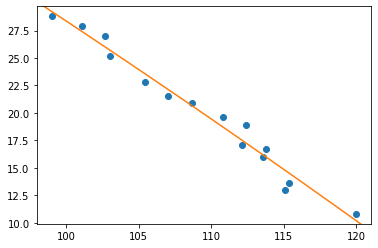

In [80]:
plt.plot(X,Y,'o')
antigo_axis = plt.axis()
plotar_curva_polinomial(np.polyfit(X,Y,deg=2,full=True)[0],*antigo_axis[0:2])
plt.axis(antigo_axis)

In [2]:
espessura = np.array([220, 220, 220, 220, 370, 370, 370, 370, 440, 440, 440, 440, 680, 680, 680, 680, 860, 860, 860, 860])
forca = np.array([24.0, 22.0, 19.1, 15.5, 26.3, 24.6, 23.1, 21.2, 25.2, 24.0, 21.7, 19.2, 17.0, 14.9, 13.0, 11.8, 12.2, 11.2, 6.6, 2.8])

In [66]:
np.stack(np.stack([np.zeros(len(espessura)) + 1,
        espessura]), espessura ** 2)

TypeError: only integer scalar arrays can be converted to a scalar index

In [43]:
import random

In [78]:
def regrecao(x1,x2,y):
    A = np.stack([np.zeros(len(espessura)) + 1,x1,x2]).T
    return np.matmul(np.linalg.pinv(A),y)

In [80]:
regrecao(espessura, espessura ** 2, forca)

array([14.52072258,  0.04323341, -0.00006001])

In [51]:
def bootstrap_sample(data):
    """amostra aleatoriamente len(dados) elementos com substituição"""
    return np.array(list(random.choice(data) for _ in data))

def bootstrap_statistic(data, stats_fn, num_samples):
    """avalia stats_fn em num_samples amostra de inicialização a partir dos dados"""
    return np.array(stats_fn(bootstrap_sample(data))
           for _ in range(num_samples))

In [108]:
estimativas_beta = []
for _ in range(1000):
    antes = bootstrap_sample(np.stack([np.zeros(len(espessura)) + 1,
                            espessura,
                            espessura ** 2,
                             forca]).T)
    estimativas_beta.append(regrecao(antes[:,1],antes[:,2],antes[:,3]))
estimativas_beta = np.array(estimativas_beta)

In [109]:
estimativas_beta.std(axis=0,ddof=1)

array([10.26109343,  0.04274793,  0.0000387 ])

In [110]:
estimativas_beta.mean(axis=0)

array([17.37489511,  0.0013589 , -0.00000099])